Mean Squared Error: 190670611.60


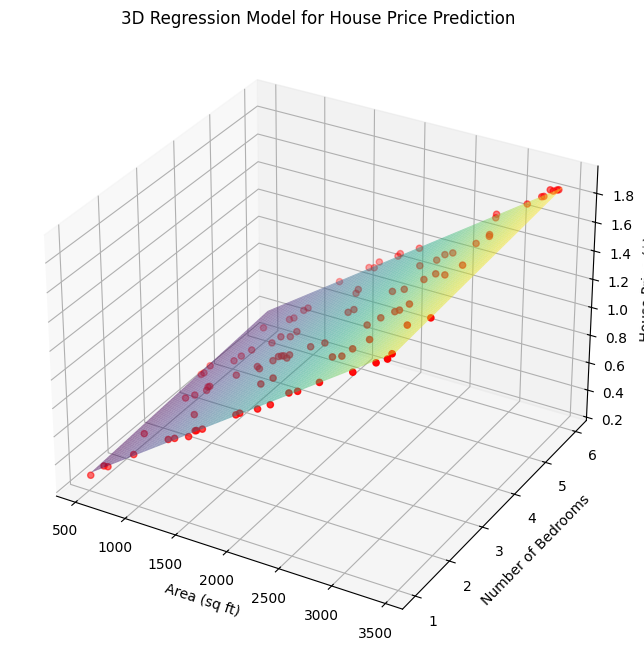

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Generate synthetic data for house prices
np.random.seed(42)

# Assume 'Area' ranges from 500 sq ft to 3500 sq ft
area = np.random.randint(500, 3500, 100)

# Assume 'Number of Bedrooms' ranges from 1 to 6
bedrooms = np.random.randint(1, 7, 100)

# Let's create a simple relationship for house price:

price = 500 * area + 20000 * bedrooms + np.random.randint(10000, 50000, 100)


X = np.column_stack((area, bedrooms))
y = price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


area_range = np.linspace(min(area), max(area), 100)
bedrooms_range = np.linspace(min(bedrooms), max(bedrooms), 100)
area_grid, bedrooms_grid = np.meshgrid(area_range, bedrooms_range)


price_grid = model.predict(np.column_stack((area_grid.ravel(), bedrooms_grid.ravel()))).reshape(area_grid.shape)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(area, bedrooms, price, color='r', label='Actual data')


ax.plot_surface(area_grid, bedrooms_grid, price_grid, cmap='viridis', alpha=0.5)


ax.set_xlabel('Area (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('House Price ($)')
ax.set_title('3D Regression Model for House Price Prediction')


plt.show()
